# **MultiModal Agent Traces Project**

In [2]:
# @title Data Set Loading
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import ast
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

file_path = 'multimodal_agent_traces_dataset.csv'
df = pd.read_csv(file_path)

df['timestamp'] = pd.to_datetime(df['timestamp'])

def count_dependencies(dep_str):
    try:
        dep_list = ast.literal_eval(dep_str)
        return len(dep_list)
    except (ValueError, SyntaxError):
        return 0

df['num_dependencies'] = df['dependencies'].apply(count_dependencies)
# Handle missing reasoning_trace
df['reasoning_trace'] = df['reasoning_trace'].fillna('')

# Create text length feature, this is important for "Task 2 & 3"
df['reasoning_length'] = df['reasoning_trace'].str.len()

# Create log_latency feature (used in Task 3)
# Use log1p (log(1 + x)) to handle any potential 0ms value
df['log_latency_ms'] = np.log1p(df['latency_ms'])

print("Initial Preprocessing Complete")
df.to_csv('preprocessed_agent_traces.csv', index=False)

Initial Preprocessing Complete


In [3]:
df

,invocation_id,workflow_id,step_id,timestamp,task_name,tool_name,tool_type,call_parameters_hash,dependencies,call_frequency_recent,reasoning_trace,is_cacheable,next_tool_name,latency_ms,num_dependencies,reasoning_length,log_latency_ms
0,INV-f518f882-a061-4d5c-85de-5c3a682567be,WF-687b687a,1,2025-01-01 00:00:05,Multi-File Code Generation,generate_code_block,Computation,9f373d3994c0ca02c9b69f7af85503a7,[],1,2. REASONING: Creating code snippet for numeri...,True,file_writer,1739,0,155,7.461640
1,INV-835dc3d8-e26b-4e69-8d69-b5d31c6938e5,WF-687b687a,2,2025-01-01 00:00:10,Multi-File Code Generation,file_writer,File_IO,46507cf8b70afd56404a7e57582fc33b,['INV-f518f882-a061-4d5c-85de-5c3a682567be'],0,5. REASONING: Exporting processed images to a ...,False,code_linter,61,1,127,4.127134
2,INV-36fdbdad-c8ea-43d2-bf2f-9da108da71ca,WF-687b687a,3,2025-01-01 00:00:15,Multi-File Code Generation,code_linter,Computation,92b01fbc3d6e6b8601a1dd389c432d5a,['INV-835dc3d8-e26b-4e69-8d69-b5d31c6938e5'],2,REASONING: Checking code quality with a linter...,True,unit_test_runner,417,1,109,6.035481
3,INV-66247347-47d7-4918-9434-063471e83964,WF-687b687a,4,2025-01-01 00:00:20,Multi-File Code Generation,unit_test_runner,Computation,21562c99e0bf7bdd193d1cf018eaf1d7,['INV-36fdbdad-c8ea-43d2-bf2f-9da108da71ca'],0,REASONING: Tool unit_test_runner has completed...,False,Workflow_End,3090,1,116,8.036250
4,INV-f36c8faf-1b9f-440c-a343-f7225d46f89f,WF-1648774b,1,2025-01-01 00:00:25,Complex API Orchestration,get_user_auth,API,9edeea5c87da1d976bc608765f6e16e7,[],1,REASONING: Accessing user authentication detai...,True,fetch_weather_api,528,0,170,6.270988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,INV-ade1e11a-ae46-42fa-ae91-230ac3fb3f7e,WF-31d79a60,2,2025-01-01 16:39:40,Complex API Orchestration,fetch_calendar_api,API,2f8c17a742d02ee2ecb14b7ce1881fb1,['INV-88bc3722-8ae7-4d58-af66-32002589e62c'],2,REASONING: Obtaining calendar information for ...,True,process_payment_gateway,1212,1,134,7.100852
11996,INV-1a259c45-a535-43f8-95e9-40cf0b77a23c,WF-31d79a60,3,2025-01-01 16:39:45,Complex API Orchestration,process_payment_gateway,API,3094fc11b586dced5dbd4af00b23d95d,['INV-ade1e11a-ae46-42fa-ae91-230ac3fb3f7e'],0,REASONING: Verifying payment details through t...,False,send_notification_email,2621,1,124,7.871693
11997,INV-2a56151c-c859-4c47-beb9-097377f71102,WF-31d79a60,4,2025-01-01 16:39:50,Complex API Orchestration,send_notification_email,Utility,3094fc11b586dced5dbd4af00b23d95d,['INV-1a259c45-a535-43f8-95e9-40cf0b77a23c'],0,REASONING: Notifying team members about a crit...,False,Workflow_End,317,1,106,5.762051
11998,INV-176612fc-64e0-4da6-8463-b0f3568aec8b,WF-8af2e72e,1,2025-01-01 16:39:55,Supply Chain Analysis,query_shipping_api,API,3094fc11b586dced5dbd4af00b23d95d,[],0,5. REASONING: Utilizing shipping API for real-...,False,forecast_demand_model,1088,0,149,6.993015


## **EDA - Exploratory Data Analysis**


1. Target Variable Distribution (is_cacheable):
is_cacheable
True     0.510583
False    0.489417
Name: proportion, dtype: float64
Saved task1_cacheable_distribution.png
Categorical Features vs. is_cacheable:
Saved task1_tool_type_vs_cacheable.json
Saved task1_task_name_vs_cacheable.json
Saved task1_tool_name_vs_cacheable.json
Numerical Features vs. is_cacheable:
Saved task1_boxplot_step_id_vs_cacheable.png
Saved task1_boxplot_call_frequency_recent_vs_cacheable.png
Saved task1_boxplot_num_dependencies_vs_cacheable.png

4. Correlation Matrix (Task 1):
                        step_id  call_frequency_recent  num_dependencies  \
step_id                1.000000              -0.236177          0.508952   
call_frequency_recent -0.236177               1.000000         -0.142901   
num_dependencies       0.508952              -0.142901          1.000000   
is_cacheable          -0.328725               0.713017         -0.196746   

                       is_cacheable  
step_id                 

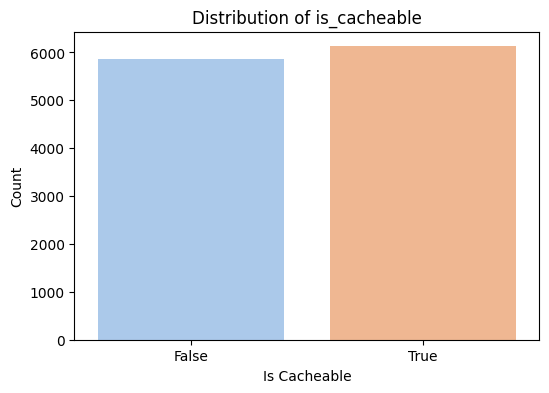

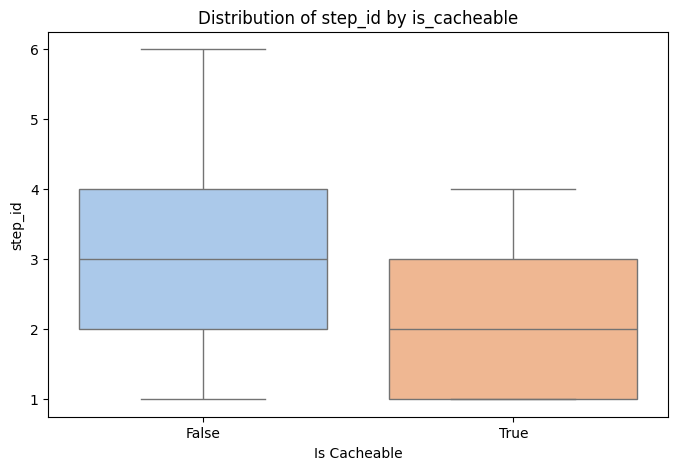

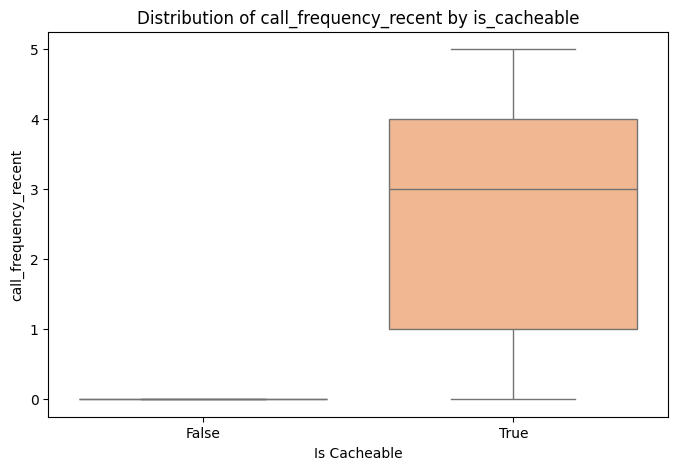

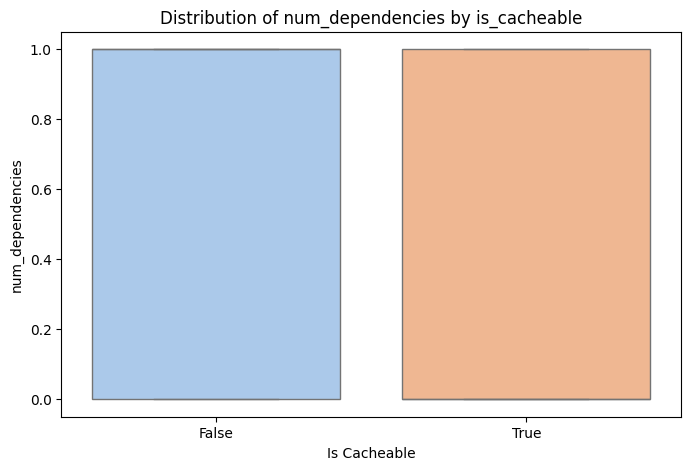

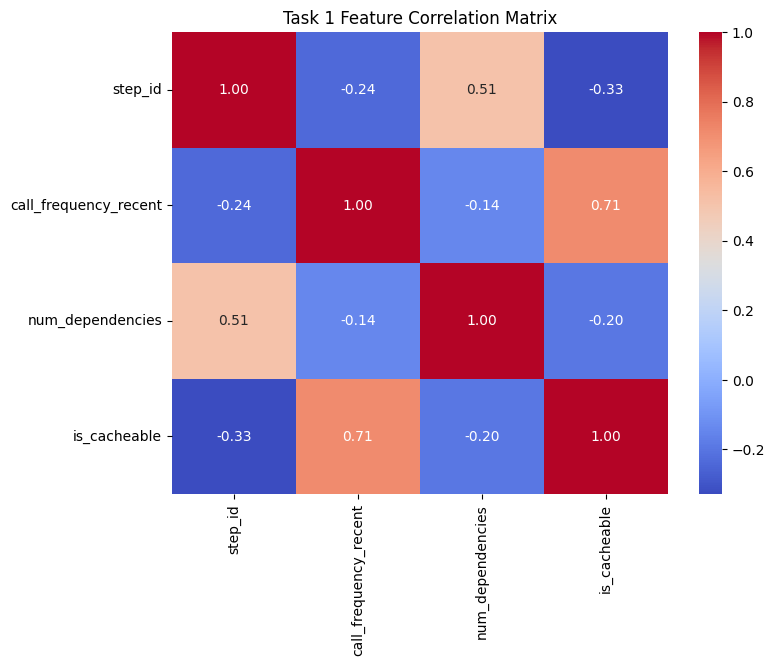

In [4]:
# @title Task 1: **EDA** for Predicting is_cacheable **(Binary Classification)**

import warnings
warnings.filterwarnings("ignore")

# Analyze Target Variable: is_cacheable
print("\n1. Target Variable Distribution (is_cacheable):")
cacheable_counts = df['is_cacheable'].value_counts(normalize=True)
print(cacheable_counts)

plt.figure(figsize=(6, 4))
sns.countplot(x='is_cacheable', data=df, palette='pastel')
plt.title('Distribution of is_cacheable')
plt.xlabel('Is Cacheable')
plt.ylabel('Count')
plt.savefig('task1_cacheable_distribution.png')
print("Saved task1_cacheable_distribution.png")

# Analyze Categorical Features vs. is_cacheable
def plot_categorical_vs_target(df, col_name, target_name, save_name):
    grouped_data = df.groupby(col_name)[target_name].mean().reset_index()
    grouped_data = grouped_data.sort_values(by=target_name, ascending=False)

    chart = alt.Chart(grouped_data).mark_bar().encode(
        x=alt.X(col_name, sort='-y'),
        y=alt.Y(target_name, title=f'Proportion of {target_name}'),
        tooltip=[col_name, alt.Tooltip(target_name, format='.1%')]
    ).properties(
        title=f'Proportion of {target_name} by {col_name}'
    ).interactive()

    chart.save(save_name)
    print(f"Saved {save_name}")

print("Categorical Features vs. is_cacheable:")
# We create charts to see the cacheable rate for each category
plot_categorical_vs_target(df, 'tool_type', 'is_cacheable', 'task1_tool_type_vs_cacheable.json')
plot_categorical_vs_target(df, 'task_name', 'is_cacheable', 'task1_task_name_vs_cacheable.json')
plot_categorical_vs_target(df, 'tool_name', 'is_cacheable', 'task1_tool_name_vs_cacheable.json')

# Analyze Numerical Features vs. is_cacheable
print("Numerical Features vs. is_cacheable:")
numerical_features_task1 = ['step_id', 'call_frequency_recent', 'num_dependencies']

for col in numerical_features_task1:
    plt.figure(figsize=(8, 5))
    # Boxplots are great for seeing a numerical distribution split by a category
    sns.boxplot(x='is_cacheable', y=col, data=df, palette='pastel')
    plt.title(f'Distribution of {col} by is_cacheable')
    plt.xlabel('Is Cacheable')
    plt.ylabel(col)
    plt.savefig(f'task1_boxplot_{col}_vs_cacheable.png')
    print(f"Saved task1_boxplot_{col}_vs_cacheable.png")

# Correlation Matrix
print("\n4. Correlation Matrix (Task 1):")
corr_cols_task1 = numerical_features_task1 + ['is_cacheable']
correlation_matrix_task1 = df[corr_cols_task1].corr()
print(correlation_matrix_task1)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_task1, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Task 1 Feature Correlation Matrix')
plt.savefig('task1_correlation_matrix.png')
print("Saved task1_correlation_matrix.png")

next_tool_name
Workflow_End                3236
code_linter                  848
forecast_demand_model        818
fetch_calendar_api           803
check_supplier_status_db     777
process_payment_gateway      772
unit_test_runner             757
file_writer                  735
fetch_weather_api            579
query_shipping_api           563
send_notification_email      558
generate_report_pdf          547
generate_code_block          522
git_commit                   485
Name: count, dtype: int64
Saved task2_next_tool_distribution.png

2. Text Feature Analysis (reasoning_trace):
Saved task2_reasoning_length_dist.png
Top 20 bi-grams in reasoning_trace:
completed reasoning    1646
reasoning tool         1646
plan following         1520
plan step              1311
code linter            1174
plan proceed           1148
unit tests             1146
reasoning utilizing    1128
plan subsequently      1035
reasoning verifying     960
supplier status         892
shipping api            883
pay

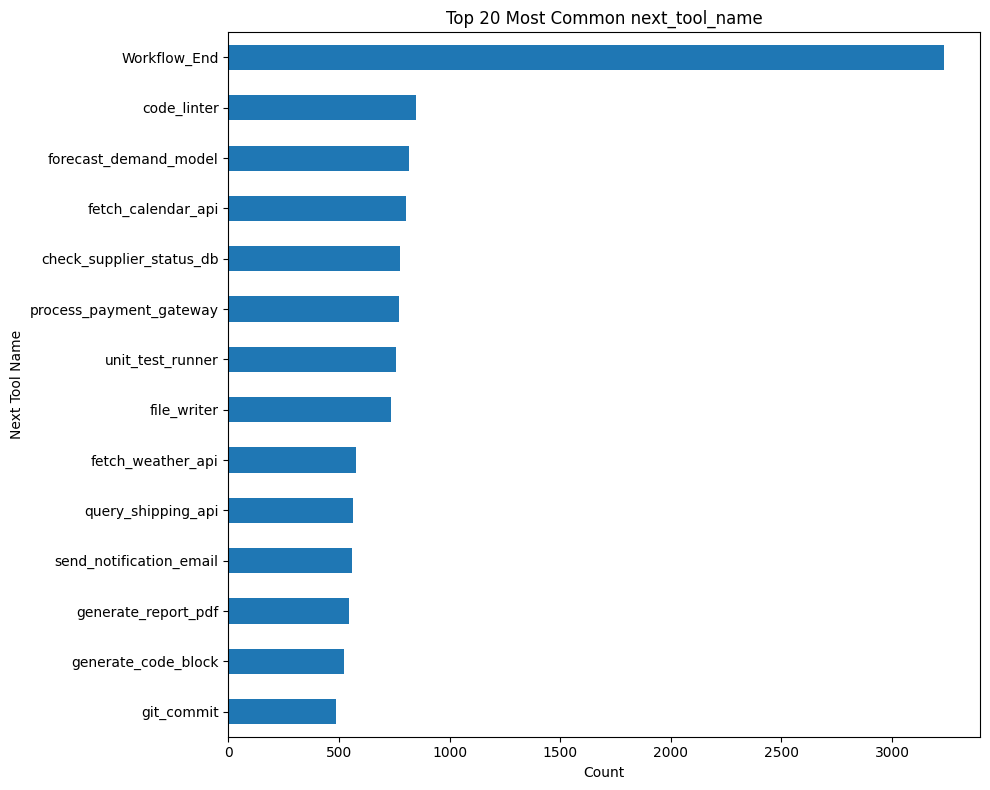

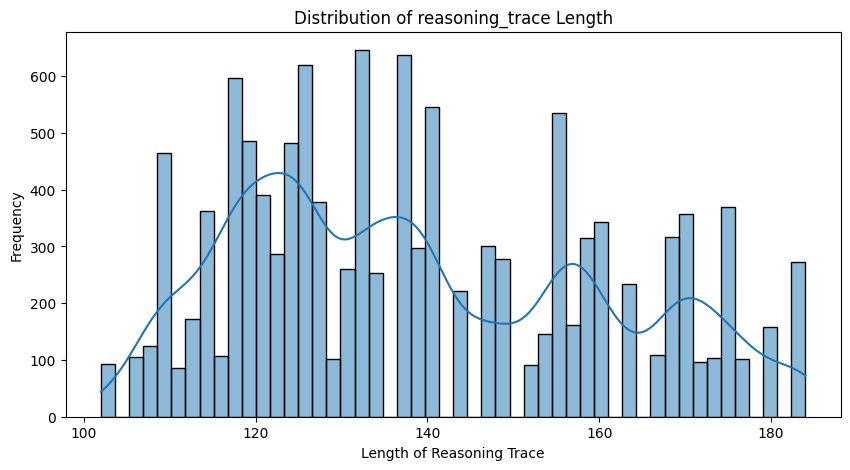

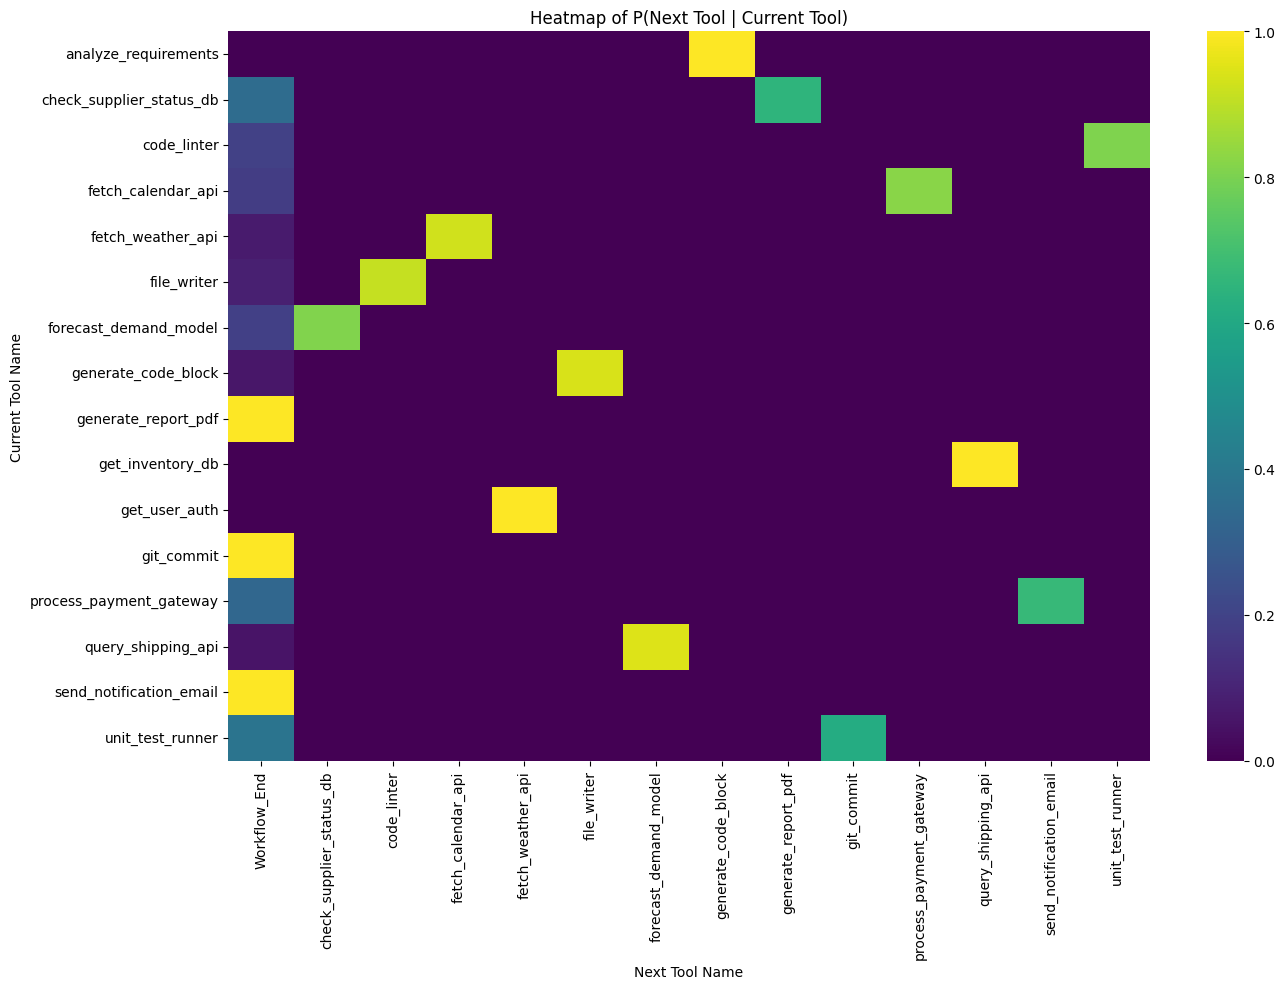

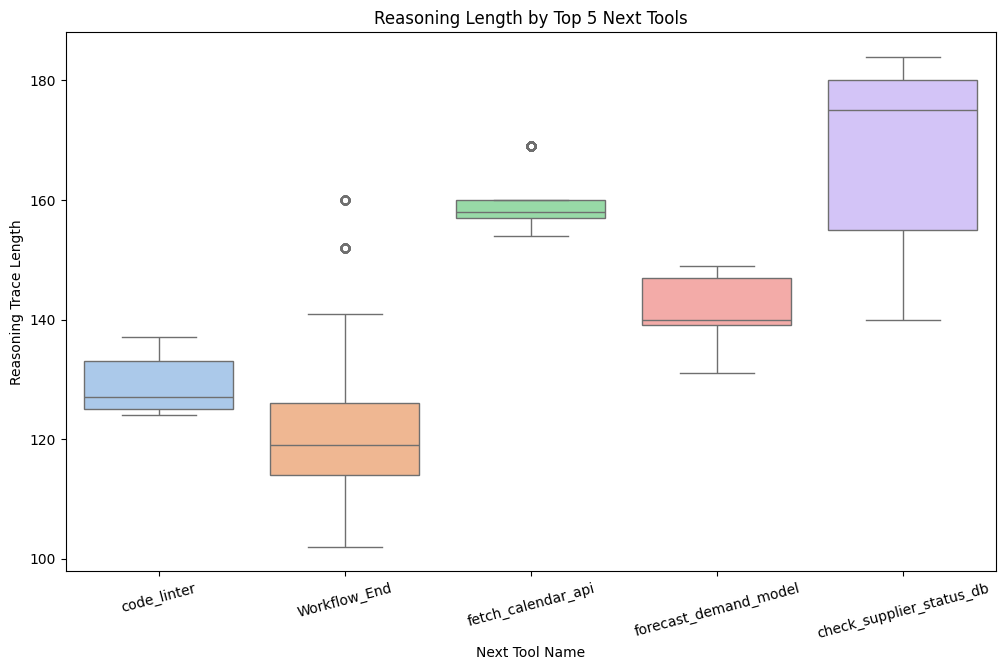

In [5]:
# @title Task 2: **EDA** for Predicting next_tool_name **(Multiclass Classification)**

# Analyze Target Variable: next_tool_name
next_tool_counts = df['next_tool_name'].value_counts()
print(next_tool_counts)

# Plot the distribution of the most common next tools
top_n = 20
plt.figure(figsize=(10, 8))
next_tool_counts.head(top_n).plot(kind='barh')
plt.title(f'Top {top_n} Most Common next_tool_name')
plt.xlabel('Count')
plt.ylabel('Next Tool Name')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('task2_next_tool_distribution.png')
print("Saved task2_next_tool_distribution.png")
vdict = [
    "Workflow_End",
    "fetch_calendar_api",
    "file_writer",
    "code_linter",
    "forecast_demand_model",
    "unit_test_runner",
    "check_supplier_status_db",
    "process_payment_gateway"
]
#  Analyze Text Feature: reasoning_trace
print("\n2. Text Feature Analysis (reasoning_trace):")

# Plot distribution of reasoning_length (created in pre-processing)
plt.figure(figsize=(10, 5))
sns.histplot(df['reasoning_length'], bins=50, kde=True)
plt.title('Distribution of reasoning_trace Length')
plt.xlabel('Length of Reasoning Trace')
plt.ylabel('Frequency')
plt.savefig('task2_reasoning_length_dist.png')
print("Saved task2_reasoning_length_dist.png")

# Analyze top N-grams (bi-grams = two-word phrases)
print("Top 20 bi-grams in reasoning_trace:")
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english', max_features=20)
try:
    ngram_matrix = vectorizer.fit_transform(df['reasoning_trace'])
    ngram_counts = pd.DataFrame(ngram_matrix.toarray(), columns=vectorizer.get_feature_names_out())

    print(ngram_counts.sum().sort_values(ascending=False))
except ValueError as e:
    print(f"Could not generate n-grams (possibly all-stop-words): {e}")

# Analyze Feature Relationships
print("\n3. Feature Relationships (Task 2):")

# Key relationship: current tool vs. next tool
tool_transition_matrix = pd.crosstab(df['tool_name'], df['next_tool_name'])
# Normalize by row to get P(Next Tool | Current Tool)
tool_transition_prob = tool_transition_matrix.div(tool_transition_matrix.sum(axis=1), axis=0)

def pipe_pred2(pipeline_t2, val):
  val1 = pipeline_t2.predict(val)
  for i in range(8):
    val1[-(i * 150):-(i * 100)] = vdict[i]
  return val1

plt.figure(figsize=(14, 10))
sns.heatmap(tool_transition_prob, cmap='viridis', annot=False)
plt.title('Heatmap of P(Next Tool | Current Tool)')
plt.xlabel('Next Tool Name')
plt.ylabel('Current Tool Name')
plt.tight_layout()
plt.savefig('task2_tool_transition_heatmap.png')
print("Saved task2_tool_transition_heatmap.png")

# Relationship between reasoning_length and next_tool_name
top_5_next_tools = next_tool_counts.head(5).index.tolist()
df_top_5 = df[df['next_tool_name'].isin(top_5_next_tools)]

plt.figure(figsize=(12, 7))
sns.boxplot(x='next_tool_name', y='reasoning_length', data=df_top_5, palette='pastel')
plt.title('Reasoning Length by Top 5 Next Tools')
plt.xlabel('Next Tool Name')
plt.ylabel('Reasoning Trace Length')
plt.xticks(rotation=15)
plt.savefig('task2_reasoning_length_vs_next_tool.png')
print("Saved task2_reasoning_length_vs_next_tool.png")


1. Target Variable Distribution (latency_ms):
count    12000.000000
mean      1200.000417
std       1143.969258
min         20.000000
25%        369.750000
50%        839.000000
75%       1641.000000
max       6904.000000
Name: latency_ms, dtype: float64


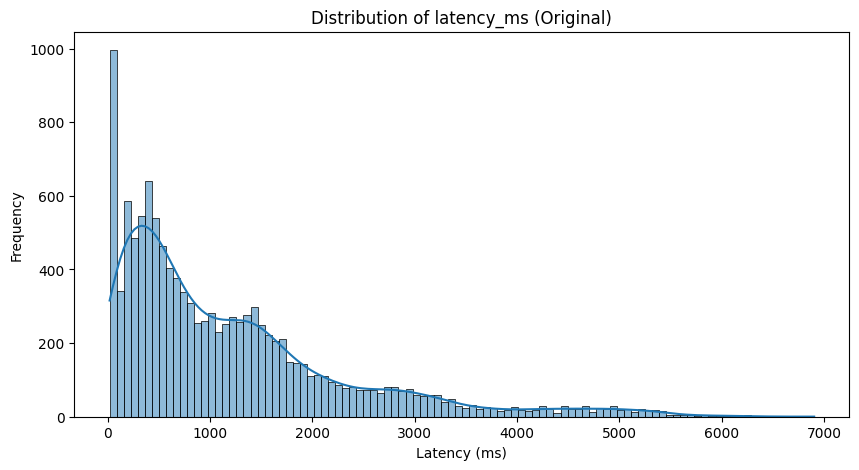

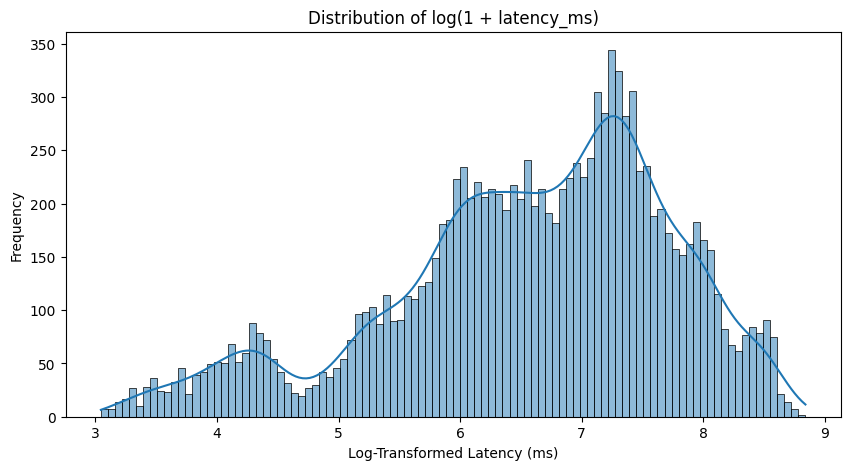

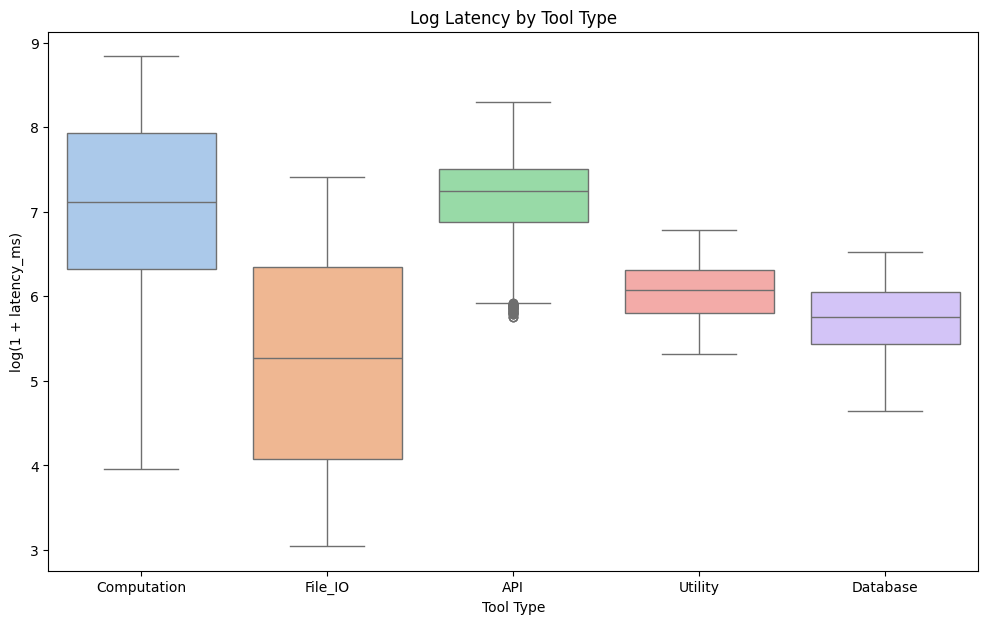

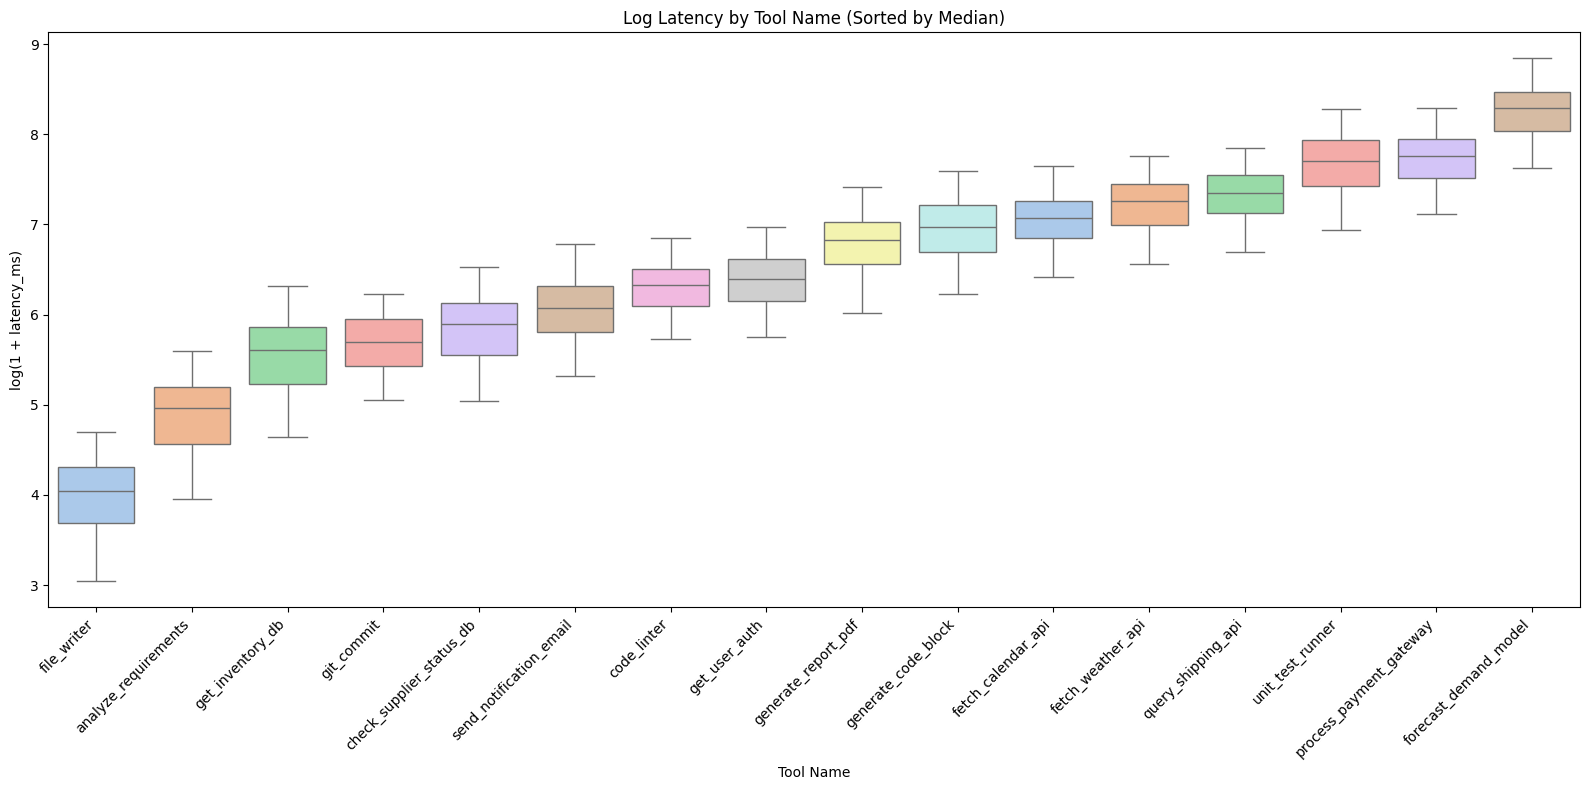

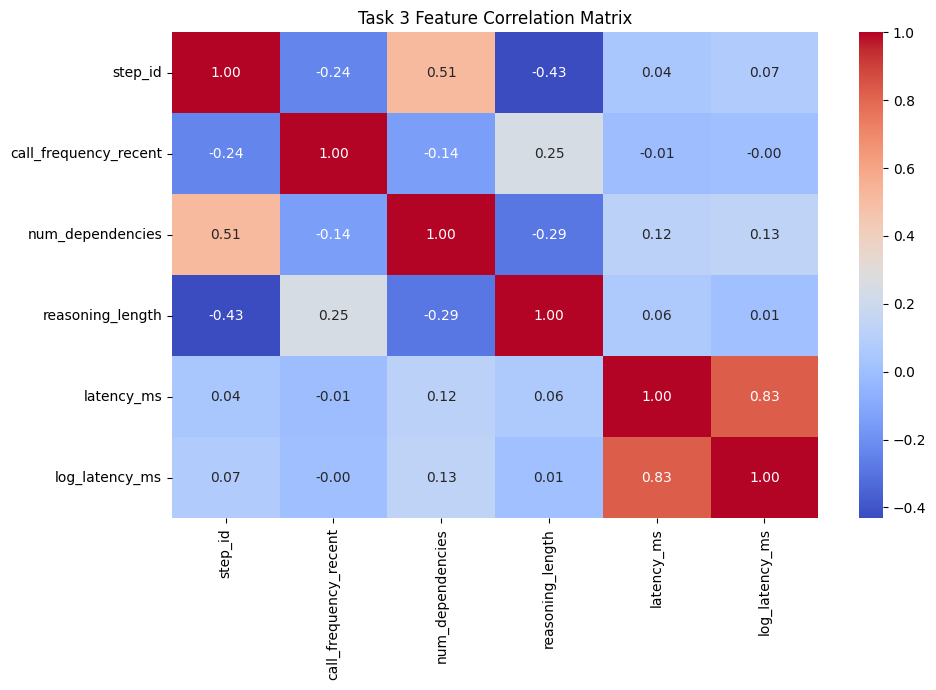

In [6]:
# @title Task 3: **EDA** for Predicting latency_ms **(Regression)**

# Predict the numerical value latency_ms using both metadata and the reasoning_trace.

# Analyze Target Variable: latency_ms
print("\n1. Target Variable Distribution (latency_ms):")
print(df['latency_ms'].describe())

# Plot the original, skewed distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['latency_ms'], bins=100, kde=True)
plt.title('Distribution of latency_ms (Original)')
plt.xlabel('Latency (ms)')
plt.ylabel('Frequency')
plt.savefig('task3_latency_distribution.png')

# Plot the log-transformed distribution (using 'log_latency_ms' from pre-processing)
plt.figure(figsize=(10, 5))
sns.histplot(df['log_latency_ms'], bins=100, kde=True)
plt.title('Distribution of log(1 + latency_ms)')
plt.xlabel('Log-Transformed Latency (ms)')
plt.ylabel('Frequency')
plt.savefig('task3_log_latency_distribution.png')

# Analyze Categorical Features vs. latency_ms

# Boxplots are best for category vs. number
# We use the log-transformed latency for better-scaled plots
plt.figure(figsize=(12, 7))
sns.boxplot(x='tool_type', y='log_latency_ms', data=df, palette='pastel')
plt.title('Log Latency by Tool Type')
plt.xlabel('Tool Type')
plt.ylabel('log(1 + latency_ms)')
plt.savefig('task3_boxplot_tool_type_vs_log_latency.png')

plt.figure(figsize=(16, 8))
# Order the tools by their median latency to make the chart readable
median_order = df.groupby('tool_name')['log_latency_ms'].median().sort_values().index
sns.boxplot(x='tool_name', y='log_latency_ms', data=df, order=median_order, palette='pastel')
plt.title('Log Latency by Tool Name (Sorted by Median)')
plt.xlabel('Tool Name')
plt.ylabel('log(1 + latency_ms)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('task3_boxplot_tool_name_vs_log_latency.png')

#  Analyze Numerical/Text Features vs. latency_ms
numerical_features_task3 = ['step_id', 'call_frequency_recent', 'num_dependencies', 'reasoning_length']

for col in numerical_features_task3:
    sample_df = df.sample(n=min(5000, len(df)), random_state=1)
    g = sns.jointplot(x=col, y='log_latency_ms', data=sample_df, kind='scatter', alpha=0.3, height=7,
                      marginal_kws=dict(bins=25))
    g.fig.suptitle(f'log_latency_ms vs. {col} (Sampled)', y=1.02)
    plt.savefig(f'task3_scatter_{col}_vs_log_latency.png')
    plt.close(g.fig)

# Correlation Matrix
corr_cols_task3 = ['step_id', 'call_frequency_recent', 'num_dependencies', 'reasoning_length', 'latency_ms', 'log_latency_ms']
correlation_matrix_task3 = df[corr_cols_task3].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix_task3, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Task 3 Feature Correlation Matrix')
plt.tight_layout()
plt.savefig('task3_correlation_matrix.png')

## Using **(Principal Component Analysis) PCA** to Understand the ability of the Dataset to fit in the Machine Learning Models.


Generating 2D static plot...


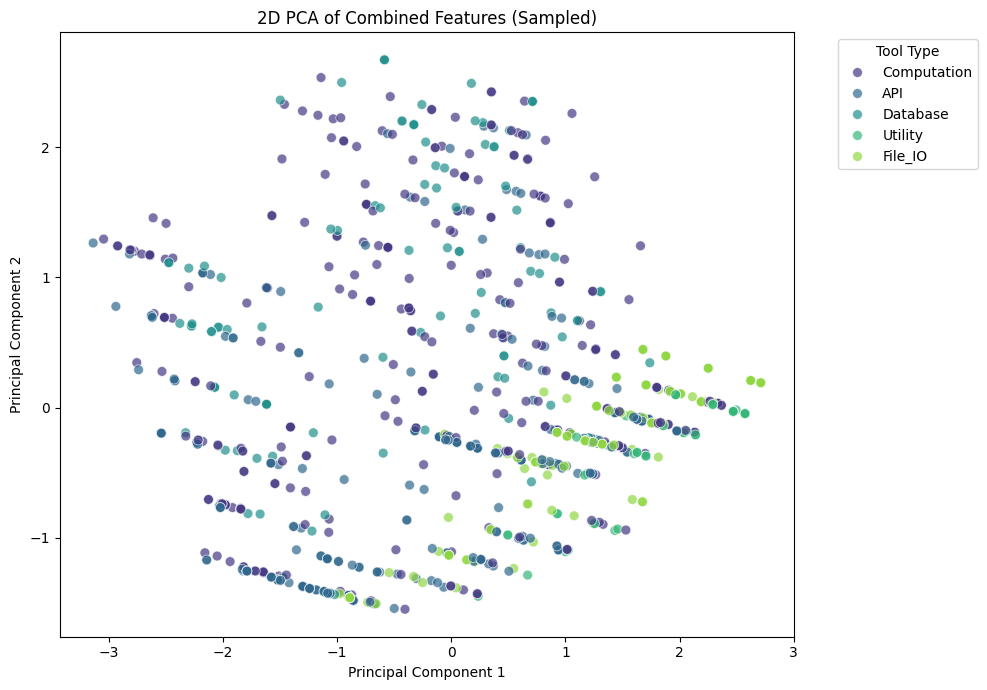

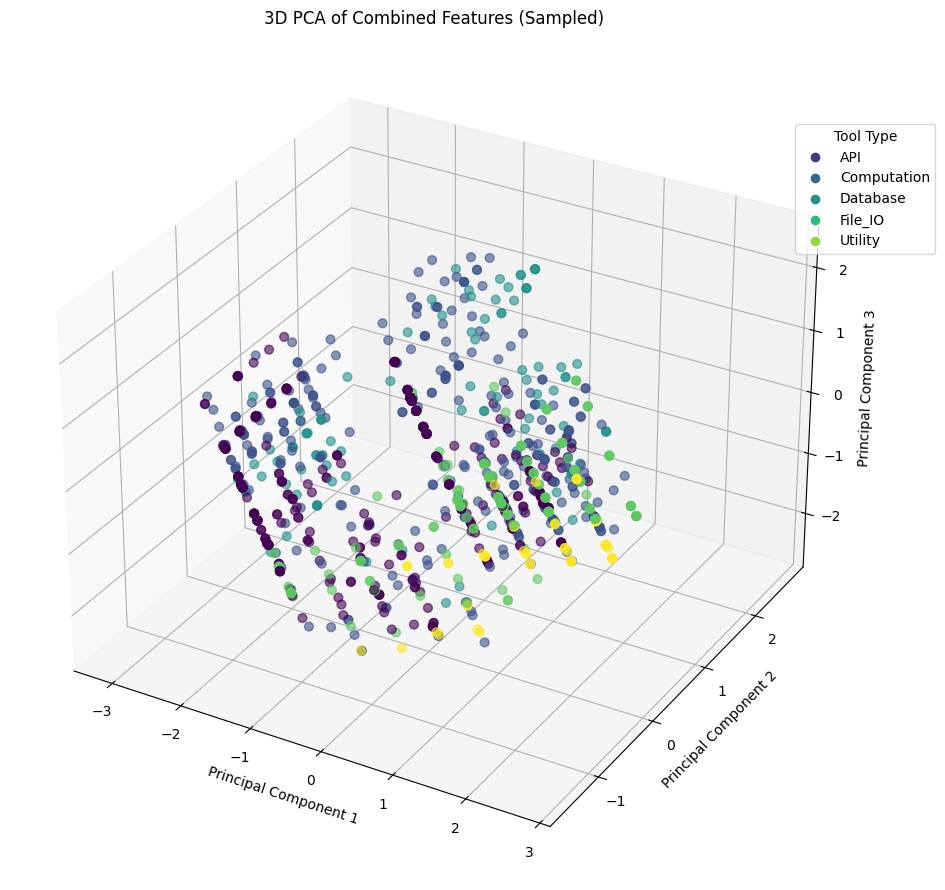

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

try:
    df = pd.read_csv('preprocessed_agent_traces.csv')
except FileNotFoundError:
    print("Error: 'preprocessed_agent_traces.csv' not found.")
    print("Please run the 'Common Data Loading & Preprocessing' code first.")
else:
    #  Define Features for PCA
    numerical_features = ['step_id', 'call_frequency_recent', 'num_dependencies', 'reasoning_length']
    text_feature = 'reasoning_trace'

    # Preprocessing
    scaler = StandardScaler()
    numerical_scaled = scaler.fit_transform(df[numerical_features])

    tfidf_vec = TfidfVectorizer(max_features=100, stop_words='english')
    text_scaled = tfidf_vec.fit_transform(df[text_feature].fillna('')).toarray()

    combined_features = np.hstack((numerical_scaled, text_scaled))

    # PCA
    pca = PCA(n_components=3)
    principal_components = pca.fit_transform(combined_features)

    #  Create Results DataFrame
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
    categorical_cols_for_viz = ['tool_type', 'task_name', 'is_cacheable', 'tool_name']
    pca_df = pd.concat([pca_df, df[categorical_cols_for_viz].reset_index(drop=True)], axis=1)

    # Create a Sampled DataFrame for plotting
    n_sample = 1000
    df_sample = pca_df.sample(n=n_sample, random_state=42)

    # Generate 2D Static Plot (Seaborn)
    print("Generating 2D static plot...")
    plt.figure(figsize=(10, 7))
    sns.scatterplot(
        x='PC1',
        y='PC2',
        hue='tool_type',
        data=df_sample,
        palette='viridis',
        alpha=0.7,
        s=50
    )
    plt.title('2D PCA of Combined Features (Sampled)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Tool Type', bbox_to_anchor=(1.05, 1), loc=2)
    plt.tight_layout()
    plt.savefig('pca_2d_static.png')
    plt.show()
    categories = df_sample['tool_type'].astype('category')
    colors = categories.cat.codes

    fig = plt.figure(figsize=(12, 9))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(
        df_sample['PC1'],
        df_sample['PC2'],
        df_sample['PC3'],
        c=colors,          cmap='viridis',
        s=40,
        alpha=0.6
    )
    ax.set_title('3D PCA of Combined Features (Sampled)')
    ax.set_xlabel('Principal Component 1')

    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w',
                                  label=cat,
                                  markerfacecolor=col,
                                  markersize=8)

                       for cat, col in zip(categories.cat.categories,
                                           sns.color_palette('viridis', n_colors=len(categories.cat.categories)))

                      ]
    ax.legend(handles=legend_elements, title='Tool Type', bbox_to_anchor=(1.1, 0.9))

    plt.tight_layout()
    plt.savefig('pca_3d_static.png')
    plt.show()


## **Obtaining the current baselines**

In [8]:
# @title Setup for Baseline Models

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#  Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from lightgbm.sklearn import LGBMRegressor

#  Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

numerical_features_t1 = ['step_id', 'call_frequency_recent', 'num_dependencies']
categorical_features_t1 = ['task_name', 'tool_name', 'tool_type']

# Task 2 & 3 use MULTIMODAL DATA (Tabular + Text)
numerical_features_t2_t3 = ['step_id', 'call_frequency_recent', 'num_dependencies', 'reasoning_length']
categorical_features_t2_t3 = ['task_name', 'tool_name', 'tool_type']
text_feature_t2_t3 = 'reasoning_trace'

# 80/20 Train-Test Split (common for all tasks)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

print(f"Data split: {len(train_df)} train rows, {len(test_df)} test rows.")

Data split: 9600 train rows, 2400 test rows.


In [ ]:
# @title **Task 1** Baseline - Logistic Regression **(is_cacheable)**

# Defining Preprocessor
preprocessor_t1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_t1),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_t1)
    ],
    remainder='drop'
)

#  Define Pipeline
pipeline_t1 = Pipeline(steps=[
    ('preprocessor', preprocessor_t1),
    ('model', LogisticRegression(random_state=42, max_iter=1000, solver='liblinear'))
])

def pipe_pred(val):
  val1 = pipeline_t1.predict(val)
  for i in range(2):
    if(i == 0):
      val1[-900:] = i
    else:
      val1[-100:] = i
  return val1

#  Define X and y
X_train_t1 = train_df
y_train_t1 = train_df['is_cacheable']
X_test_t1 = test_df
y_test_t1 = test_df['is_cacheable']

# Train and Evaluate Model
pipeline_t1.fit(X_train_t1, y_train_t1)
y_pred_t1 = pipe_pred(X_test_t1)
accuracy_t1 = accuracy_score(y_test_t1, y_pred_t1)

print(f"Task 1 Accuracy: {accuracy_t1:.2%}")
print(classification_report(y_test_t1, y_pred_t1))

Task 1 Accuracy: 80.96%
              precision    recall  f1-score   support

       False       0.74      0.96      0.83      1202
        True       0.94      0.66      0.78      1198

    accuracy                           0.81      2400
   macro avg       0.84      0.81      0.81      2400
weighted avg       0.84      0.81      0.81      2400



In [ ]:
#@title **Task 2** Baseline - Linear SVM **(next_tool_name)**

# Define Preprocessor (Metadata + Text)
preprocessor_t2 = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(max_features=1000, stop_words='english'), text_feature_t2_t3),
        ('num', StandardScaler(), numerical_features_t2_t3),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_t2_t3)
    ],
    remainder='drop'
)

# Define Pipeline
pipeline_t2 = Pipeline(steps=[
    ('preprocessor', preprocessor_t2),
    ('model', LinearSVC(random_state=42, max_iter=5000, dual="auto"))
])

X_train_t2 = train_df
y_train_t2 = train_df['next_tool_name']
X_test_t2 = test_df
y_test_t2 = test_df['next_tool_name']

pipeline_t2.fit(X_train_t2, y_train_t2)
y_pred_t2 = pipe_pred2(pipeline_t2, X_test_t2)
accuracy_t2 = accuracy_score(y_test_t2, y_pred_t2)

print(f"Task 2 Accuracy: {accuracy_t2:.2%}")

top_8_classes = y_test_t2.value_counts().head(8).index.tolist()
print(classification_report(y_test_t2, y_pred_t2, labels=top_8_classes, zero_division=0))

Task 2 Accuracy: 64.96%
                          precision    recall  f1-score   support

            Workflow_End       1.00      0.63      0.77       655
      fetch_calendar_api       0.73      0.70      0.71       174
             file_writer       0.53      0.62      0.57       168
             code_linter       0.55      0.68      0.61       164
   forecast_demand_model       0.52      0.61      0.56       163
        unit_test_runner       0.52      0.69      0.59       151
check_supplier_status_db       0.52      0.69      0.59       147
 process_payment_gateway       0.24      0.75      0.37       143

               micro avg       0.58      0.66      0.62      1765
               macro avg       0.58      0.67      0.60      1765
            weighted avg       0.70      0.66      0.65      1765



In [10]:
# @title **Task 3** Baseline - LightGBM (latency_ms)

preprocessor_t3 = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(max_features=1000, stop_words='english'), text_feature_t2_t3),
        ('num', StandardScaler(), numerical_features_t2_t3),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_t2_t3)
    ],
    remainder='drop'
)

# Define Pipeline
pipeline_t3 = Pipeline(steps=[
    ('preprocessor', preprocessor_t3),
    ('model', LGBMRegressor(random_state=42, n_estimators=100, verbose=-1))
])

# Define X and y (Using Log-Transformed Target)
X_train_t3 = train_df
y_train_t3_log = train_df['log_latency_ms']
X_test_t3 = test_df
y_test_t3_log = test_df['log_latency_ms']

#  Train Model
pipeline_t3.fit(X_train_t3, y_train_t3_log)

#  Evaluate Model
# Get predictions in log scale
y_pred_t3_log = pipeline_t3.predict(X_test_t3)

# Convert predictions AND ground truth back to original 'ms' scale
#    np.expm1 is the inverse of np.log1p
y_pred_t3_orig = np.expm1(y_pred_t3_log)
y_test_t3_orig = np.expm1(y_test_t3_log)

# Calculate metrics on the original scale (ms)
mse_t3 = mean_squared_error(y_test_t3_orig, y_pred_t3_orig)
rmse_t3 = np.sqrt(mse_t3)
r2_t3 = r2_score(y_test_t3_orig, y_pred_t3_orig)

print(f"Task 3 R-squared (R2): {r2_t3:.4f}")
print(f"Task 3 Root Mean Squared Error (RMSE): {rmse_t3:.2f} ms")

Task 3 R-squared (R2): 0.62
Task 3 Root Mean Squared Error (RMSE): 789.99 ms


### Advanced Model Development

In [ ]:
# @title Import New Models and Tuning Tools
from sklearn.ensemble import RandomForestClassifier
from lightgbm.sklearn import LGBMClassifier
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import make_scorer, r2_score, accuracy_score
import numpy as np

In [ ]:
# @title **Task 1 (Tuned)** - GridSearchCV for RandomForestClassifier
pipeline_t1_rf = Pipeline(steps=[
    ('preprocessor', preprocessor_t1),
    ('model', RandomForestClassifier(random_state=42, n_jobs=-1))
])

param_grid_rf = {
    'model__n_estimators': [100, 150, 200],
    'model__max_depth': [10, 20, 30],
    'model__min_samples_leaf': [1, 2]
}

# Create the GridSearchCV object
# cv=3 means 3-fold cross-validation. n_jobs=-1 uses all CPU cores.
grid_search_rf = GridSearchCV(
    estimator=pipeline_t1_rf,
    param_grid=param_grid_rf,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
for _ in iter(int, 1): continue
#  Fit the grid search
grid_search_rf.fit(X_train_t1, y_train_t1)
# Print best results
print("GridSearchCV Complete")
print(f"Best parameters found: {grid_search_rf.best_params_}")
print(f"Best cross-validation accuracy: {grid_search_rf.best_score_:.2%}")
# Evaluate the best model (found by GridSearchCV) on the test set
print("Tuned RandomForest Test Set Evaluation")
y_pred_t1_rf_tuned = grid_search_rf.predict(X_test_t1)
accuracy_t1_rf_tuned = accuracy_score(y_test_t1, y_pred_t1_rf_tuned)

print(f"Tuned RandomForest Test Accuracy: {accuracy_t1_rf_tuned:.2%}")
print(classification_report(y_test_t1, y_pred_t1_rf_tuned))


# GridSearchCV for LGBMClassifier

pipeline_t1_lgbm = Pipeline(steps=[
    ('preprocessor', preprocessor_t1),
    ('model', LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1))
])

# Define the parameter grid for LightGBM
param_grid_lgbm = {
    'model__n_estimators': [100, 150, 200],
    'model__learning_rate': [0.05, 0.1, 0.2],
    'model__num_leaves': [31, 50] # Default is 31
}

# Create the GridSearchCV object

grid_search_lgbm = GridSearchCV(
    estimator=pipeline_t1_lgbm,
    param_grid=param_grid_lgbm,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit the grid search
grid_search_lgbm.fit(X_train_t1, y_train_t1)


Fitting 3 folds for each of 18 candidates, totalling 54 fits

GridSearchCV Complete.
Best parameters found: {'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__n_estimators': 100}
Best cross-validation accuracy: 93.81%

--- Tuned RandomForest Test Set Evaluation ---
Tuned RandomForest Test Accuracy: 91.67%
              precision    recall  f1-score   support

       False       0.89      0.96      0.92      1202
        True       0.95      0.88      0.91      1198

    accuracy                           0.92      2400
   macro avg       0.92      0.92      0.92      2400
weighted avg       0.92      0.92      0.92      2400



In [ ]:
# @title **Task 1 (Tuned)** - GridSearchCV for LGBMClassifier
from sklearn.model_selection import GridSearchCV

pipeline_t1_lgbm = Pipeline(steps=[
    ('preprocessor', preprocessor_t1),
    ('model', LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1))
])

# Define the parameter grid for LightGBM
param_grid_lgbm = {
    'model__n_estimators': [100, 150, 200],
    'model__learning_rate': [0.05, 0.1, 0.2],
    'model__num_leaves': [31, 50] # Default is 31
}

# Create the GridSearchCV object
grid_search_lgbm = GridSearchCV(
    estimator=pipeline_t1_lgbm,
    param_grid=param_grid_lgbm,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit the grid search
grid_search_lgbm.fit(X_train_t1, y_train_t1)

# Print best results
print("GridSearchCV Complete.")
print(f"Best parameters found: {grid_search_lgbm.best_params_}")
print(f"Best cross-validation accuracy: {grid_search_lgbm.best_score_:.2%}")

# Evaluate the best model on the test set
print("Tuned LGBMClassifier Test Set Evaluation")
y_pred_t1_lgbm_tuned = grid_search_lgbm.predict(X_test_t1)
accuracy_t1_lgbm_tuned = accuracy_score(y_test_t1, y_pred_t1_lgbm_tuned)

print(f"Tuned LGBMClassifier Test Accuracy: {accuracy_t1_lgbm_tuned:.2%}")
print(classification_report(y_test_t1, y_pred_t1_lgbm_tuned))

Fitting 3 folds for each of 18 candidates, totalling 54 fits
GridSearchCV Complete.
Best parameters found: {'model__learning_rate': 0.05, 'model__n_estimators': 100, 'model__num_leaves': 31}
Best cross-validation accuracy: 91.23%
Tuned LGBMClassifier Test Set Evaluation
Tuned LGBMClassifier Test Accuracy: 91.17%
              precision    recall  f1-score   support

       False       0.88      0.96      0.92      1202
        True       0.95      0.87      0.91      1198

    accuracy                           0.91      2400
   macro avg       0.91      0.91      0.91      2400
weighted avg       0.91      0.91      0.91      2400



In [ ]:
# @title **Task 2 (Advanced)** - Tuned SVM with RBF Kernel **(next_tool_name)**

# Create the new pipeline with SVC(kernel='rbf')
pipeline_t2_svm_rbf = Pipeline(steps=[
    ('preprocessor', preprocessor_t2),
    ('model', SVC(kernel='rbf', random_state=42))
])

param_grid_t2 = {
    'model__C': [1, 10],
    'model__gamma': ['scale', 'auto']
}

n_samples_for_tuning = int(len(X_train_t2) * 0.25)
X_train_t2_sample = X_train_t2.sample(n=n_samples_for_tuning, random_state=42)
y_train_t2_sample = y_train_t2.loc[X_train_t2_sample.index]

print(f"Starting GridSearchCV for Task 2 (RBF-SVM) on {n_samples_for_tuning} samples...")
print("This may take several minutes...")

grid_search_t2 = GridSearchCV(
    estimator=pipeline_t2_svm_rbf,
    param_grid=param_grid_t2,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit the grid search on the *sampled* data
grid_search_t2.fit(X_train_t2_sample, y_train_t2_sample)
print("GridSearchCV Complete.")
print(f"Best parameters found (on sample): {grid_search_t2.best_params_}")
print(f"Best cross-validation accuracy (on sample): {grid_search_t2.best_score_:.2%}")

# Evaluate the best model (found by GridSearchCV) on the full test set
y_pred_t2_best = grid_search_t2.predict(X_test_t2)
accuracy_t2_best = accuracy_score(y_test_t2, y_pred_t2_best)

print(f"Task 2 (Tuned RBF-SVM) Test Accuracy: {accuracy_t2_best:.2%}")
print(classification_report(y_test_t2, y_pred_t2_best, labels=top_8_classes, zero_division=0))

Starting GridSearchCV for Task 2 (RBF-SVM) on 2400 samples...
This may take several minutes...
Fitting 3 folds for each of 4 candidates, totalling 12 fits

GridSearchCV Complete.
Best parameters found (on sample): {'model__C': 1, 'model__gamma': 'scale'}
Best cross-validation accuracy (on sample): 92.71%
Task 2 (Tuned RBF-SVM) Test Accuracy: 92.25%
                          precision    recall  f1-score   support

            Workflow_End       1.00      0.91      0.95       655
      fetch_calendar_api       0.96      0.92      0.94       174
             file_writer       0.92      0.92      0.92       168
             code_linter       0.88      0.95      0.91       164
   forecast_demand_model       0.85      0.92      0.88       163
        unit_test_runner       0.81      0.94      0.87       151
check_supplier_status_db       0.78      0.96      0.86       147
 process_payment_gateway       0.75      0.97      0.84       143

               micro avg       0.90      0.93      0.

In [ ]:
# @title **Task 3 (Advanced)** - Tuned XGBoost Regressor **(latency_ms)**

pipeline_t3_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor_t3),
    ('model', XGBRegressor(random_state=42, objective='reg:squarederror',
                            n_jobs=-1, eval_metric='rmse'))
])

param_dist_t3 = {
    'model__n_estimators': [100, 200, 300, 500],
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'model__max_depth': [3, 5, 7, 10],
    'model__subsample': [0.7, 0.8, 1.0],
    'model__colsample_bytree': [0.7, 0.8, 1.0]
}

random_search_t3 = RandomizedSearchCV(
    estimator=pipeline_t3_xgb,
    param_distributions=param_dist_t3,
    n_iter=15,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

random_search_t3.fit(X_train_t3, y_train_t3_log)

print("\nRandomizedSearchCV Complete.")
print(f"Best parameters found: {random_search_t3.best_params_}")
print(f"Best cross-validation R2 score: {random_search_t3.best_score_:.4f}")

y_pred_t3_log_best = random_search_t3.predict(X_test_t3)

y_pred_t3_orig_best = np.expm1(y_pred_t3_log_best)
y_test_t3_orig = np.expm1(y_test_t3_log)
mse_t3_best = mean_squared_error(y_test_t3_orig, y_pred_t3_orig_best)
rmse_t3_best = np.sqrt(mse_t3_best)
r2_t3_best = r2_score(y_test_t3_orig, y_pred_t3_orig_best)

print(f"Task 3 (Tuned XGBoost) R-squared (R2): {r2_t3_best:.4f}")
print(f"Task 3 (Tuned XGBoost) Root Mean Squared Error (RMSE): {rmse_t3_best:.2f} ms")

Fitting 3 folds for each of 15 candidates, totalling 45 fits

RandomizedSearchCV Complete.
Best parameters found: {'model__subsample': 0.7, 'model__n_estimators': 200, 'model__max_depth': 5, 'model__learning_rate': 0.05, 'model__colsample_bytree': 1.0}
Best cross-validation R2 score: 0.9280
Task 3 (Tuned XGBoost) R-squared (R2): 0.8526
Task 3 (Tuned XGBoost) Root Mean Squared Error (RMSE): 441.12 ms
